In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [6]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.drop(['POS'], axis =1)
data = data.fillna(method="ffill")
data.head(12)

,Sentence #,Word,Tag
0,Sentence: 1,Thousands,O
1,Sentence: 1,of,O
2,Sentence: 1,demonstrators,O
3,Sentence: 1,have,O
4,Sentence: 1,marched,O
5,Sentence: 1,through,O
6,Sentence: 1,London,B-geo
7,Sentence: 1,to,O
8,Sentence: 1,protest,O
9,Sentence: 1,the,O


In [44]:
words = list(set(data['Word'].values))
words.append('PADword')
n_words = len(words)
n_words

35179

In [8]:
tags = list(set(data["Tag"].values))
n_tags = len(tags)
n_tags

17

In [9]:
def data2sentences(data):
    agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),s["Tag"].values.tolist())]
    grouped = data.groupby("Sentence #").apply(agg_func)
    sentences = [s for s in grouped]
    return sentences

In [10]:
sentences = data2sentences(data)
print(len(sentences))

47959


In [11]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 104 words


In [12]:
max_len = 50
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [13]:
word2idx["Obama"]

18134

In [14]:
tag2idx["B-geo"]

12

In [15]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words - 1)

In [16]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [17]:
from tensorflow.keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=2018)

In [20]:
import tensorflow as tf

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=n_words, output_dim=50, input_length=max_len),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, return_sequences=True, recurrent_dropout=0)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_tags, activation="softmax"))
])

In [31]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=tf.keras.metrics.Recall())

In [32]:
history = model.fit(X_tr, np.array(y_tr), batch_size=32, epochs=5, verbose=1)

Epoch 1/5
1349/1349 [==============================] - 33s 15ms/step - loss: 0.1318 - recall: 0.9549
Epoch 2/5
1349/1349 [==============================] - 21s 15ms/step - loss: 0.0525 - recall: 0.9813
Epoch 3/5
1349/1349 [==============================] - 20s 15ms/step - loss: 0.0440 - recall: 0.9847
Epoch 4/5
1349/1349 [==============================] - 20s 15ms/step - loss: 0.0398 - recall: 0.9863
Epoch 5/5
1349/1349 [==============================] - 20s 15ms/step - loss: 0.0370 - recall: 0.9873


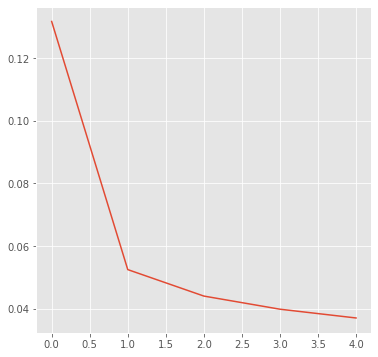

In [38]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(6,6))
plt.plot(hist["loss"])
plt.show()

## evaluate the model

In [39]:
i = 2318
p = model.predict(np.array([X_te[i]]))
p = np.argmax(p, axis=-1)

In [45]:
for w, pred in zip(X_te[i], p[0]):
    print("{:10}: {}".format(words[w], tags[pred]))

Venezuelan: B-gpe
mediocre  : B-per
cohesion  : I-per
Luzhkov   : I-per
unilaterally: O
Cuban     : B-gpe
leader    : O
Fidel     : B-per
inflammatory: I-per
have      : O
post-tsunami: O
losing    : O
sleek     : O
mosques   : O
Free      : O
checking  : O
origin    : O
Namibia   : O
sleek     : O
Americas  : B-org
as        : O
outlawed  : O
plan      : O
rhythm-and-blues: O
Washington: B-geo
to        : O
unlawfully: O
Latin     : B-geo
America   : I-geo
scooters  : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
PADword   : O
